In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings
warnings.filterwarnings('ignore')
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
!jupyter nbextension enable --py widgetsnbextension --sys-prefix
!jupyter serverextension enable voila --sys-prefix

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
Enabling: voila
- Writing config: /Users/zsyver/opt/anaconda3/etc/jupyter
    - Validating...
      voila 0.3.6 OK


In [4]:
# Image Widget Space Intro

sun_files = ['s1.png','s2.png','s3.png','s4.png','s5.png','s6.png','s7.png','s8.png','s9.png']

file = open("space_photo.png", "rb")
image = file.read()

image_headline = widgets.Image(
                    value=image,
                    format='jpg',
                    width='300'
                )

label_headline = widgets.Label(
                    value='Photo setting: Space',
                    style={'description_width': 'initial'}
                )

vbox_headline = widgets.VBox([image_headline, label_headline])

In [5]:
# Type of Sailor

sailor_type = widgets.ToggleButtons(
            options=['Astronaut', 'Cosmonaut', 'Taikonaut']
        )

In [6]:
# Sun Mood

mood_of_sun = widgets.ToggleButtons(
            options=['Angry', 'Happy', 'Disgusted', 'Sad', 'Fearful', 'Bad', 'Neutral and Relaxed']
        )

In [7]:
# name

name = widgets.Text(placeholder='Your name here')

In [8]:
# magnetic intensity of the sun

sun_mag_slider = widgets.IntSlider(
            value=5, # default value
            min=0, 
            max=8,
            step=1,
            style={'description_width': 'initial', 'handle_color': '#16a085'} 
        )

In [9]:
# button send


button_send = widgets.Button(
                description='View the sun',
                tooltip='View',
                style={'description_width': 'initial'}
            )

output = widgets.Output()

sun_mag_int = sun_mag_slider.value


def on_button_clicked(event):
    with output:
        clear_output()
        print("The Journey: ")
        print(f"I am the {sailor_type.value}, {name.value}.")
        print(f"The sun's mood is {mood_of_sun.value}")
        print(f"And the sun is shining at {sun_mag_slider.value} magnetic intensity")
        img = mpimg.imread(sun_files[sun_mag_slider.value])
        plt.imshow(img)
        

button_send.on_click(on_button_clicked)

vbox_result = widgets.VBox([button_send, output])


In [10]:
# Right side stacked widget info

text_0 = widgets.HTML(value="<h1>Welcome to Space!</h1>")
text_1 = widgets.HTML(value="<h2>Before you begin your journey to the sun, what should we call you?</h2>")
text_1a = widgets.HTML(value="<h2>Name:</h2>")
text_2= widgets.HTML(value="<h2>I want to see the sun in this kind of mood:</h2>")
# text_3= widgets.HTML(value="<h2>for dinner, if that's okay for you!</h2>")
text_4= widgets.HTML(value="<h2>Magnetic intensity for this trip is</h2>")
# text_5= widgets.HTML(value="<h2>hungry ghosts for dinner, if that's okay for you!</h2>")


vbox_text = widgets.VBox([text_0, text_1, sailor_type,text_1a, name, text_2, mood_of_sun, text_4, sun_mag_slider, vbox_result])




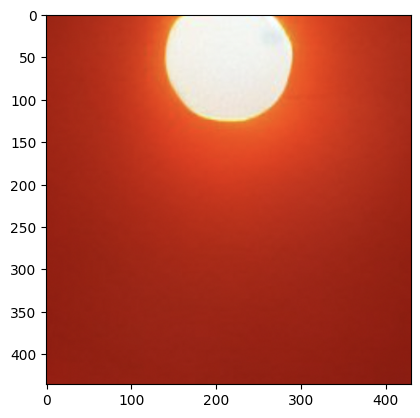

In [11]:
page = widgets.HBox([vbox_headline, vbox_text])
display(page)

In [12]:
!pip freeze > requirements.txt